In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.loc[df['Name']=='Deion Sanders','Sport'] = 'baseball'

df.columns = df.columns.str.lower()

df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


In [ ]:
# Section: Earning over time
# The first hypothesis is to test the average earning of top 10 ranked players increases over time

In [3]:
#creating a dataframe on average earnings
avg_earnings_by_year = df.groupby("year")["earnings"].mean()
df_avg_earnings = pd.DataFrame(avg_earnings_by_year).reset_index()
df_avg_earnings = df_avg_earnings.rename(columns={'earnings': 'avg_earnings'})
df_avg_earnings.head()

,year,avg_earnings
0,1990,12.80
1,1991,18.35
2,1992,15.87
3,1993,17.83
4,1994,14.89


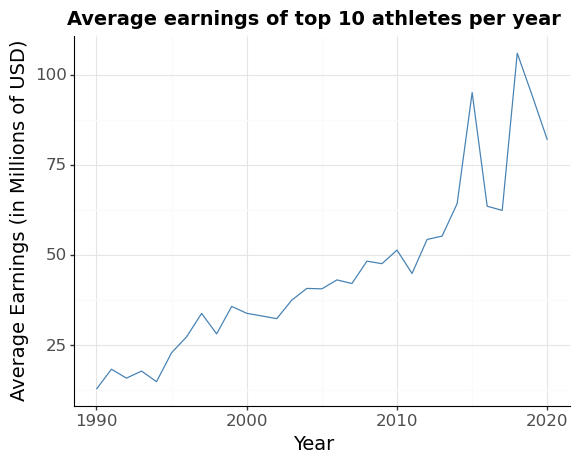

<ggplot: (8789180813776)>

In [4]:
#plotting a line graph to see the general trend of average earning over time
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))
 + geom_line(color='steelblue')
 + labs(title='Average earnings of top 10 athletes per year', x='Year', y='Average Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [5]:
reg1_avg = smf.ols('avg_earnings~year',df_avg_earnings).fit() 
reg1_avg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avg_earnings   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.33e-12
Time:                        14:24:09   Log-Likelihood:                -110.47
No. Observations:                  30   AIC:                             224.9
Df Residuals:                      28   BIC:                             227.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4802.6131    402.125    -11.943      0.000   -5626.329   -3978.898
year           2.4179      0.201     12.057      0.000       2.007       2.829
==============================================================================
Omnibus:                       14.925   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.813
Skew:                           1.420   Prob(JB):                     0.000368
Kurtosis:                       5.140   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Regression analysis:
# The coefficient for the year variable is 2.4179, indicating that for each one-year increase in the year, 
# the average earnings of the top 10 ranked athlete increase by an average of $2.4179 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 83.8% of the dependent variable (earnings) is explained by the independent variable (year)

# p-value < 0.05, suggesting a significant relationship.
# This means that there is a positive relationship between year and average earnings of top 10 athletes, 
# indicating that the earning of highest-paid top 10 athletes tends to increase as time goes on
# Thus, we should not reject the first hypothesis

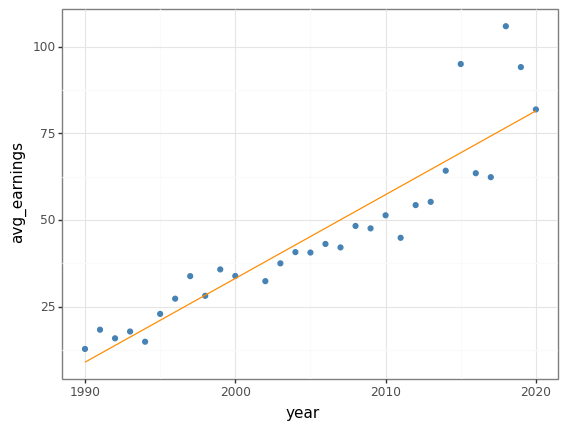

<ggplot: (8789231890439)>

In [6]:
# We can explore the relationship on a scatterplot with the regression line
df_avg_earnings['reg1_pred_avg_earning']=reg1_avg.predict() 

(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg1_pred_avg_earning'), color='darkorange')+ theme_bw()
)

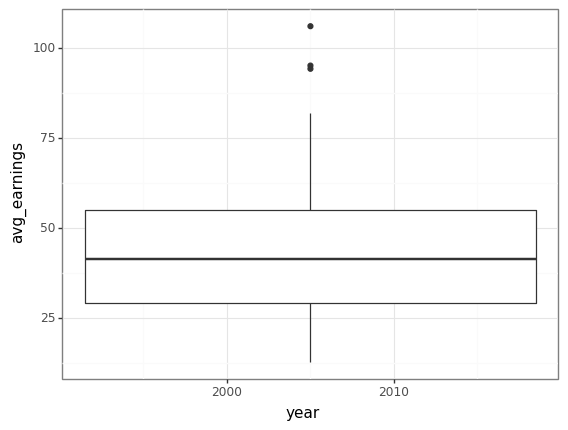

<ggplot: (8789231886870)>

In [7]:
# We can identify 3 outliers from the box plot below
(ggplot(df_avg_earnings, aes(x='year', y='avg_earnings')) +
        geom_boxplot()+theme_bw()
)

In [8]:
#identifying the three outliers
df_avg_earnings.sort_values(by='avg_earnings', inplace=True, ascending=False)
print(df_avg_earnings.iloc[0])
print(df_avg_earnings.iloc[1])
print(df_avg_earnings.iloc[2])

year                     2018.000000
avg_earnings              105.940000
reg1_pred_avg_earning      76.670187
Name: 27, dtype: float64
year                     2015.000000
avg_earnings               95.030000
reg1_pred_avg_earning      69.416545
Name: 24, dtype: float64
year                     2019.000000
avg_earnings               94.140000
reg1_pred_avg_earning      79.088067
Name: 28, dtype: float64


In [ ]:
# The second hypothesis to test the earning of highest-paid athletes increases as time goes on

In [9]:
# Creating a dataframe with athletes only ranked top 1
df_no1 = df[(df.current_rank == 1)]
df_no1.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,basketball,1994,30.0


In [10]:
df_no1.describe()

,s.no,current_rank,year,earnings
count,30.00000,30.0,30.000000,30.000000
mean,146.60000,1.0,2005.133333,91.396667
std,88.45751,0.0,9.216677,60.464293
min,1.00000,1.0,1990.000000,28.600000
25%,73.50000,1.0,1997.250000,62.625000
50%,147.00000,1.0,2005.500000,79.300000
75%,219.50000,1.0,2012.750000,103.750000
max,292.00000,1.0,2020.000000,300.000000


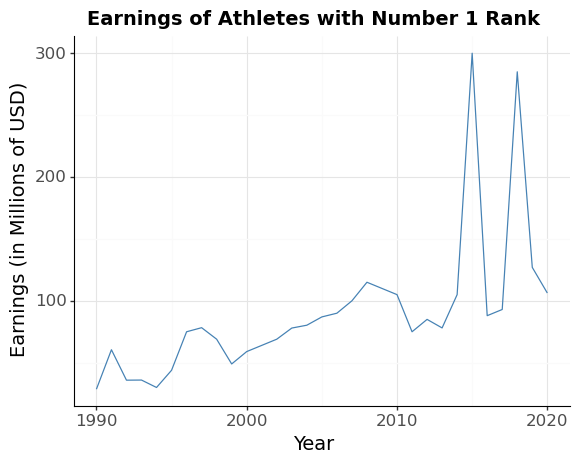

<ggplot: (8789232014945)>

In [11]:
# Creating a line graph to see the general trend
(ggplot(df_no1, aes(x='year', y='earnings'))
 + geom_line(color='steelblue')
 + labs(title='Earnings of Athletes with Number 1 Rank', x='Year', y='Earnings (in Millions of USD)')
 + theme_bw()
 + theme(plot_title=element_text(weight='bold', size=14),
         axis_text=element_text(size=12),
         axis_title=element_text(size=14),
         panel_border=element_blank(),
         axis_line=element_line(size=.8)))

In [12]:
# From the line graph above, we can see a general increasing trend with some outliers
# We can perform a regressional analysis on earnings in years
reg2_top1earnings = smf.ols('earnings~year',df_no1).fit() 
reg2_top1earnings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     18.84
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           0.000167
Time:                        14:26:53   Log-Likelihood:                -157.40
No. Observations:                  30   AIC:                             318.8
Df Residuals:                      28   BIC:                             321.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8251.8236   1921.946     -4.293      0.000   -1.22e+04   -4314.896
year           4.1609      0.959      4.341      0.000       2.198       6.124
==============================================================================
Omnibus:                       32.185   Durbin-Watson:                   2.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.620
Skew:                           2.377   Prob(JB):                     1.70e-16
Kurtosis:                       8.958   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Regression analysis:
# The coefficient for the year variable is 4.1609, indicating that for each one-year increase in the year, 
# the earnings of the top-ranked athlete increase by an average of $4.16 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 40.2% of the dependent variable (earnings) is explained by the independent variable (year)
# the adjusted R-squared value of 0.381 suggests that there may be other factors affecting the variation in earnings beyond just the year variable.

# p-value < 0.05, suggesting a significant relationship.
# This means that there is a positive relationship between year and earnings, 
# indicating that the earning of highest-paid athletes tends to increase as time goes on
# Thus, we should not reject the second hypothesis

/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_73903/3277967541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


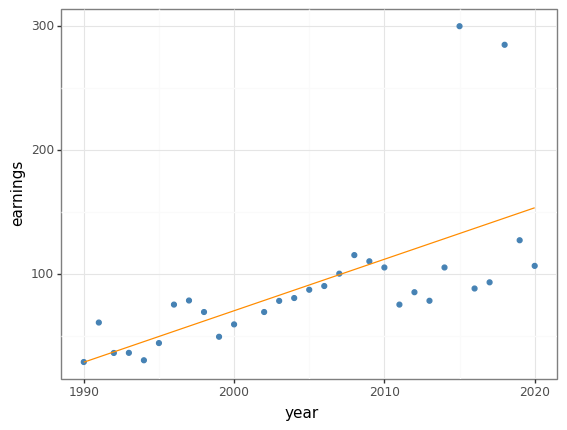

<ggplot: (8789248242360)>

In [13]:
# We can then apply the regression on predicted earning in a line on scatterplot
df_no1['reg2_pred_earning']=reg2_top1earnings.predict() 

(ggplot(df_no1, aes(x='year', y='earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg2_pred_earning'), color='darkorange')+ theme_bw()
)

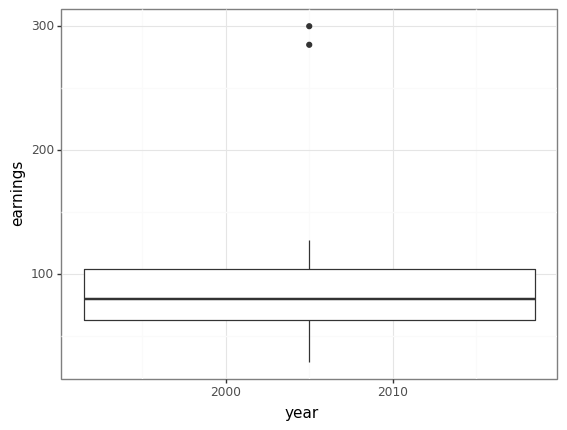

<ggplot: (8789231887894)>

In [25]:
# The majority of the earning data fit well with the line
# except for two outliers that we can identify from the box plot below
# Although we have less outliers than the first regression,
# the two are further from the rest of the data points
(ggplot(df_no1, aes(x='year', y='earnings')) +
        geom_boxplot()+theme_bw()
)

In [15]:
#identifying the two outliers
df_no1.sort_values(by='earnings', inplace=True, ascending=False)
print(df_no1.iloc[0])
print(df_no1.iloc[1])

s.no                               242
name                  Floyd Mayweather
nationality                        USA
current_rank                         1
previous_year_rank                   1
sport                           boxing
year                              2015
earnings                         300.0
reg2_pred_earning            132.45118
Name: 241, dtype: object
s.no                               272
name                  Floyd Mayweather
nationality                        USA
current_rank                         1
previous_year_rank                >100
sport                           boxing
year                              2018
earnings                         285.0
reg2_pred_earning           144.933971
Name: 271, dtype: object


/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_73903/2306220266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Comparing to the first regression/hypothesis:
# The coefficient on year is higher in the second regression than in the first,
# suggesting the average earnings of top 10 players increase less than the top-1 ranked player over time.

# The R-squared is significantly higher in the first hypothesis,
# indicating a stronger positive correlation between year and average earnings.

In [ ]:
# After we verified the increasing trend of earnings over time
# The third hypothesis is to test the growth rate of top 1 ranked players' earnings increases over time
# continuously using df_no1 over time

In [16]:
df_no1['ln_earnings'] = np.log(df_no1['earnings'])
df_no1.head()

/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_73903/3584939266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,reg2_pred_earning,ln_earnings
241,242,Floyd Mayweather,USA,1,1,boxing,2015,300.0,132.451180,5.703782
271,272,Floyd Mayweather,USA,1,>100,boxing,2018,285.0,144.933971,5.652489
281,282,Lionel Messi,Argentina,1,2,soccer,2019,127.0,149.094901,4.844187
171,172,Tiger Woods,USA,1,1,golf,2008,115.0,103.324667,4.744932
181,182,Tiger Woods,USA,1,1,golf,2009,110.0,107.485598,4.700480


In [17]:
reg3_lnearnings = smf.ols('ln_earnings ~ year', data=df_no1).fit()
reg3_lnearnings.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_earnings   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     46.81
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.96e-07
Time:                        14:34:09   Log-Likelihood:                -8.4789
No. Observations:                  30   AIC:                             20.96
Df Residuals:                      28   BIC:                             23.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.4778     13.423     -6.517      0.000    -114.974     -59.981
year           0.0458      0.007      6.842      0.000       0.032       0.060
==============================================================================
Omnibus:                        4.794   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.441
Skew:                           0.809   Prob(JB):                        0.179
Kurtosis:                       3.365   Cond. No.                     4.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Regression analysis
# The coefficient for the year variable is 0.0458, indicating that for each one-year increase in the year, 
# the growth rate of earning of the top-ranked athlete increase by an average of $0.0458 million, holding all other variables constant.

# R-squared is a measure of how closely the data in a regression line fit the data in the sample
# In this case, 62.6% of the dependent variable (earnings) is explained by the independent variable (year)

# p-value < 0.05, suggesting a significant relationship.
# This indicates that there is strong evidence that year has a positive effect on ln_earnings.
# Thus, we should not reject this hypothesis

/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_73903/1875572439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


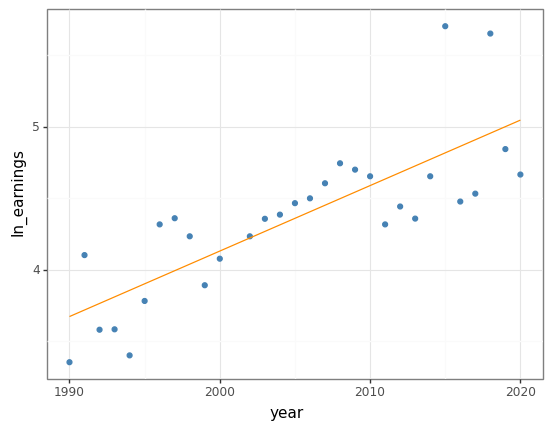

<ggplot: (8789231968720)>

In [19]:
# We can then apply the regression on predicted ln_earning in a line on scatterplot
df_no1['reg3_pred_lnearning']=reg3_lnearnings.predict() 

(ggplot(df_no1, aes(x='year', y='ln_earnings'))+
geom_point(color='steelblue')+
geom_line(aes(x='year', y='reg3_pred_lnearning'), color='darkorange')+ theme_bw()
)

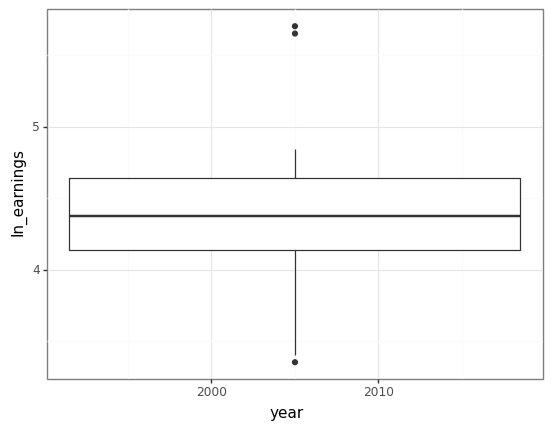

<ggplot: (8789231966660)>

In [20]:
# The majority of the earning data fit well with the line
# We can use the box plot below to check if there is any outliers
(ggplot(df_no1, aes(x='year', y='ln_earnings')) +
        geom_boxplot()+theme_bw()
)

In [27]:
# We can see that there are three outliers.
# We can identify them by sorting the dataset both ascending and descending
df_no1.sort_values(by='ln_earnings', inplace=True, ascending=False)
print(df_no1.iloc[0])
print(df_no1.iloc[1])

df_no1.sort_values(by='ln_earnings', inplace=True, ascending=True)
print(df_no1.iloc[0])

s.no                                242
name                   Floyd Mayweather
nationality                         USA
current_rank                          1
previous_year_rank                    1
sport                            boxing
year                               2015
earnings                          300.0
reg2_pred_earning             132.45118
ln_earnings                    5.703782
reg3_pred_lnearning            4.817953
Name: 241, dtype: object
s.no                                272
name                   Floyd Mayweather
nationality                         USA
current_rank                          1
previous_year_rank                 >100
sport                            boxing
year                               2018
earnings                          285.0
reg2_pred_earning            144.933971
ln_earnings                    5.652489
reg3_pred_lnearning            4.955366
Name: 271, dtype: object
s.no                            1
name                   Mike Tyson
na

/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_73903/2206313326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/fc/6tf_xth56x574dr03jkmxzt80000gn/T/ipykernel_73903/2206313326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Overall, for the section on earnings over time, the three regressions tested are all valid
# All models show an increase of earnings in relation to time. 
# Although we need to consider other variables as well, as suggested in the R^2 of especially the second regression,
# time is definitely an important variable when considering the overall trend of earning